In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
subset_results = pd.read_csv('./subset_results.csv')
subset_results

,model,dataset,acc
0,lite,ArrowHead,0.821714
1,lite,BeetleFly,0.870000
2,lite,Car,0.923333
3,lite,Earthquakes,0.710791
4,lite,FaceAll,0.791361
...,...,...,...
63,inceptiontime,ArrowHead,0.833143
64,inceptiontime,BeetleFly,0.900000
65,inceptiontime,Car,0.810000
66,inceptiontime,FreezerSmallTrain,0.802386


In [3]:
def set_color(acc1, acc2):
    colors = []
    for i in range(len(acc1)):
        if acc1[i] > acc2[i]:
            colors.append('blue')
        elif acc2[i] > acc1[i]:
            colors.append('red')
        else:
            colors.append('green')
    return colors

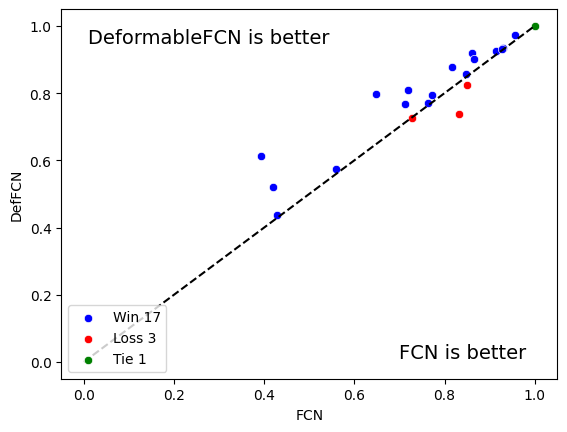

In [4]:
fcn_acc = subset_results.query(f'model == "fcn"').sort_values(by='dataset').acc.values
def_fcn_acc = subset_results.query(f'model == "deffcn"').sort_values(by='dataset').acc.values

sns.scatterplot(
    x=fcn_acc[fcn_acc < def_fcn_acc],
    y=def_fcn_acc[fcn_acc < def_fcn_acc],
    color='blue',
    label=f'Win {len(def_fcn_acc[fcn_acc < def_fcn_acc])}'
)

sns.scatterplot(
    x=fcn_acc[fcn_acc > def_fcn_acc],
    y=def_fcn_acc[fcn_acc > def_fcn_acc],
    color='red',
    label=f'Loss {len(def_fcn_acc[fcn_acc > def_fcn_acc])}'
)

sns.scatterplot(
    x=fcn_acc[fcn_acc == def_fcn_acc],
    y=def_fcn_acc[fcn_acc == def_fcn_acc],
    color='green',
    label=f'Tie {len(def_fcn_acc[fcn_acc == def_fcn_acc])}'
)

plt.plot(list(np.arange(0, 1.1, 0.1)), list(np.arange(0, 1.1, 0.1)), color='black', linestyle='dashed')    

plt.xlabel('FCN')
plt.ylabel('DefFCN')

plt.text(0.7, 0.01, 'FCN is better', fontdict={'size': 14})
plt.text(0.01, 0.95, 'DeformableFCN is better', fontdict={'size': 14})

plt.legend(loc='lower left')

plt.show()

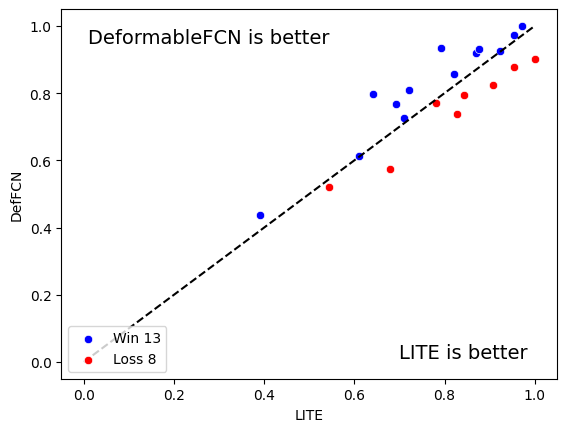

In [5]:
lite_acc = subset_results.query(f'model == "lite"').sort_values(by='dataset').acc.values
def_fcn_acc = subset_results.query(f'model == "deffcn"').sort_values(by='dataset').acc.values

sns.scatterplot(
    x=lite_acc[lite_acc < def_fcn_acc],
    y=def_fcn_acc[lite_acc < def_fcn_acc],
    color='blue',
    label=f'Win {len(def_fcn_acc[lite_acc < def_fcn_acc])}'
)

sns.scatterplot(
    x=lite_acc[lite_acc > def_fcn_acc],
    y=def_fcn_acc[lite_acc > def_fcn_acc],
    color='red',
    label=f'Loss {len(def_fcn_acc[lite_acc > def_fcn_acc])}'
)

sns.scatterplot(
    x=lite_acc[lite_acc == def_fcn_acc],
    y=def_fcn_acc[lite_acc == def_fcn_acc],
    color='green',
    label=f'Tie {len(def_fcn_acc[lite_acc == def_fcn_acc])}'
)

plt.plot(list(np.arange(0, 1.1, 0.1)), list(np.arange(0, 1.1, 0.1)), color='black', linestyle='dashed')    

plt.xlabel('LITE')
plt.ylabel('DefFCN')

plt.text(0.7, 0.01, 'LITE is better', fontdict={'size': 14})
plt.text(0.01, 0.95, 'DeformableFCN is better', fontdict={'size': 14})

plt.legend(loc='lower left')
plt.show()